In [20]:
import os
import pandas as pd
from glob import glob
import paramiko
from getpass import getpass
import traceback
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
os.chdir("/home/stotoshka/Documents/ANGEL_dev")

# Подготовка выборок для обучения

In [22]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
for w in 2 3 4
do
	echo "Window radius = "$w
	python Proteasome/in_vitro/prepareTrain.py -t I -w $w
done

Window radius = 2
Num substrate = 24
Fold 0:
Train 23
0    444
1    265
Name: activity, dtype: int64
Test 1
0    309
1    124
Name: activity, dtype: int64
Fold 1:
Train 20
0    566
1    316
Name: activity, dtype: int64
Test 4
0    187
1     73
Name: activity, dtype: int64
Fold 2:
Train 18
0    681
1    341
Name: activity, dtype: int64
Test 6
0    72
1    48
Name: activity, dtype: int64
Fold 3:
Train 18
0    686
1    331
Name: activity, dtype: int64
Test 6
0    67
1    58
Name: activity, dtype: int64
Fold 4:
Train 17
0    635
1    303
Name: activity, dtype: int64
Test 7
0    118
1     86
Name: activity, dtype: int64
Window radius = 3
Num substrate = 24
Fold 0:
Train 23
0    409
1    254
Name: activity, dtype: int64
Test 1
0    307
1    124
Name: activity, dtype: int64
Fold 1:
Train 20
0    535
1    307
Name: activity, dtype: int64
Test 4
0    181
1     71
Name: activity, dtype: int64
Fold 2:
Train 18
0    652
1    334
Name: activity, dtype: int64
Test 6
0    64
1    44
Name: activity, d

# Конвертация в SDF

In [24]:
to_convert_files = glob("Proteasome/in_vitro/immuno/train/*_ready_*.csv")
print(to_convert_files)

['Proteasome/in_vitro/immuno/train/train_ready_immuno_2_3.csv', 'Proteasome/in_vitro/immuno/train/train_ready_immuno_4_1.csv', 'Proteasome/in_vitro/immuno/train/train_ready_immuno_3_4.csv', 'Proteasome/in_vitro/immuno/train/test_ready_immuno_3_1.csv', 'Proteasome/in_vitro/immuno/train/test_ready_immuno_3_0.csv', 'Proteasome/in_vitro/immuno/train/train_ready_immuno_4_0.csv', 'Proteasome/in_vitro/immuno/train/test_ready_immuno_4_0.csv', 'Proteasome/in_vitro/immuno/train/test_ready_immuno_3_3.csv', 'Proteasome/in_vitro/immuno/train/train_ready_immuno_2_4.csv', 'Proteasome/in_vitro/immuno/train/train_ready_immuno_4_3.csv', 'Proteasome/in_vitro/immuno/train/test_ready_immuno_2_1.csv', 'Proteasome/in_vitro/immuno/train/test_ready_immuno_2_4.csv', 'Proteasome/in_vitro/immuno/train/test_ready_immuno_3_4.csv', 'Proteasome/in_vitro/immuno/train/train_ready_immuno_4_4.csv', 'Proteasome/in_vitro/immuno/train/test_ready_immuno_3_2.csv', 'Proteasome/in_vitro/immuno/train/test_ready_immuno_2_3.csv', 

In [25]:
%%time
for file in to_convert_files:
	print(file)
	path_to_config = "Proteasome/in_vitro/immuno/converter_config.json"
	command = f"python tools/generateConfigForConverter.py -i {os.path.join(os.getcwd(),file)} -o {os.path.join(os.getcwd(),'Proteasome/in_vitro/immuno/sdf')} -c peptide -t 10 {path_to_config}"
	os.system(command)
	print("Convertation")
	convert_command = f"python tools/SeqToSDF.py {path_to_config}"
	os.system(convert_command)

Proteasome/in_vitro/immuno/train/train_ready_immuno_2_3.csv
Success
Convertation
Success
--- 0.17440199851989746 seconds ---
Proteasome/in_vitro/immuno/train/train_ready_immuno_4_1.csv
Success
Convertation
Success
--- 0.6845095157623291 seconds ---
Proteasome/in_vitro/immuno/train/train_ready_immuno_3_4.csv
Success
Convertation
Success
--- 0.3813507556915283 seconds ---
Proteasome/in_vitro/immuno/train/test_ready_immuno_3_1.csv
Success
Convertation
Success
--- 0.17403388023376465 seconds ---
Proteasome/in_vitro/immuno/train/test_ready_immuno_3_0.csv
Success
Convertation
Success
--- 0.2147505283355713 seconds ---
Proteasome/in_vitro/immuno/train/train_ready_immuno_4_0.csv
Success
Convertation
Success
--- 0.7046043872833252 seconds ---
Proteasome/in_vitro/immuno/train/test_ready_immuno_4_0.csv
Success
Convertation
Success
--- 0.40677523612976074 seconds ---
Proteasome/in_vitro/immuno/train/test_ready_immuno_3_3.csv
Success
Convertation
Success
--- 0.0693211555480957 seconds ---
Proteasom

In [26]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
rm Proteasome/in_vitro/immuno/sdf/*.txt
cp Proteasome/in_vitro/immuno/sdf/* /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf

# Генерация заданий для обучения и валидации

In [27]:
train_files = glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train*.sdf")
print(train_files)

['/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train_ready_immuno_2_0.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train_ready_immuno_2_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train_ready_immuno_2_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train_ready_immuno_2_3.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train_ready_immuno_2_4.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train_ready_immuno_3_0.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train_ready_immuno_3_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train_ready_immuno_3_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/train_ready_immuno_3_3.sdf', '/run/use

In [28]:
for file in train_files:
	for level in range(2,13):
		name = os.path.splitext(os.path.basename(file))[0]
		print(f"{name}_{level}")
		command = f"python tools/generateConfigForTrain.py -l {level} -b {name}_{level} -s sdf/{os.path.basename(file)} -a activity -p models/{name}_{level} /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/{name}_{level}_tr.txt"
		os.system(command)

train_ready_immuno_2_0_2
Success
train_ready_immuno_2_0_3
Success
train_ready_immuno_2_0_4
Success
train_ready_immuno_2_0_5
Success
train_ready_immuno_2_0_6
Success
train_ready_immuno_2_0_7
Success
train_ready_immuno_2_0_8
Success
train_ready_immuno_2_0_9
Success
train_ready_immuno_2_0_10
Success
train_ready_immuno_2_0_11
Success
train_ready_immuno_2_0_12
Success
train_ready_immuno_2_1_2
Success
train_ready_immuno_2_1_3
Success
train_ready_immuno_2_1_4
Success
train_ready_immuno_2_1_5
Success
train_ready_immuno_2_1_6
Success
train_ready_immuno_2_1_7
Success
train_ready_immuno_2_1_8
Success
train_ready_immuno_2_1_9
Success
train_ready_immuno_2_1_10
Success
train_ready_immuno_2_1_11
Success
train_ready_immuno_2_1_12
Success
train_ready_immuno_2_2_2
Success
train_ready_immuno_2_2_3
Success
train_ready_immuno_2_2_4
Success
train_ready_immuno_2_2_5
Success
train_ready_immuno_2_2_6
Success
train_ready_immuno_2_2_7
Success
train_ready_immuno_2_2_8
Success
train_ready_immuno_2_2_9
Success
trai

In [29]:
test_files = glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test*.sdf")
print(test_files)

['/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test_ready_immuno_2_0.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test_ready_immuno_2_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test_ready_immuno_2_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test_ready_immuno_2_3.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test_ready_immuno_2_4.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test_ready_immuno_3_0.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test_ready_immuno_3_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test_ready_immuno_3_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/sdf/test_ready_immuno_3_3.sdf', '/run/user/1000/gv

In [30]:
for file in test_files:
	for level in range(2,13):
		name = os.path.splitext(os.path.basename(file))[0]
		print(f"{name}_{level}")
		command = f"python tools/generateConfigForPrediction.py -m models/{name.replace('test','train')}_{level}.MSAR -s sdf/{os.path.basename(file)} -a activity -p results /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/{name}_{level}_val.txt"
		os.system(command)

test_ready_immuno_2_0_2
Success
test_ready_immuno_2_0_3
Success
test_ready_immuno_2_0_4
Success
test_ready_immuno_2_0_5
Success
test_ready_immuno_2_0_6
Success
test_ready_immuno_2_0_7
Success
test_ready_immuno_2_0_8
Success
test_ready_immuno_2_0_9
Success
test_ready_immuno_2_0_10
Success
test_ready_immuno_2_0_11
Success
test_ready_immuno_2_0_12
Success
test_ready_immuno_2_1_2
Success
test_ready_immuno_2_1_3
Success
test_ready_immuno_2_1_4
Success
test_ready_immuno_2_1_5
Success
test_ready_immuno_2_1_6
Success
test_ready_immuno_2_1_7
Success
test_ready_immuno_2_1_8
Success
test_ready_immuno_2_1_9
Success
test_ready_immuno_2_1_10
Success
test_ready_immuno_2_1_11
Success
test_ready_immuno_2_1_12
Success
test_ready_immuno_2_2_2
Success
test_ready_immuno_2_2_3
Success
test_ready_immuno_2_2_4
Success
test_ready_immuno_2_2_5
Success
test_ready_immuno_2_2_6
Success
test_ready_immuno_2_2_7
Success
test_ready_immuno_2_2_8
Success
test_ready_immuno_2_2_9
Success
test_ready_immuno_2_2_10
Success
t

# Запуск обучения и валидации

In [31]:
def checkTrain(path):
	flag = False
	header = "No	 Check	 Number	 IAP	 20-Fold	 Activity Type"
	try:
		with open(path,"r",encoding="cp1252") as log:
			for line in log:
				if header in line:
					flag = True
	except:
		traceback.print_exc()
	finally:
		return flag

In [32]:
def checkValidation(path):
	try:
		f=False
		with open(path,"r",encoding="cp1252") as log:
			for line in log:
				if "are predicted" in line:
					comps = line.strip().split(" ")
					if int(comps[0]) == int(comps[2]):
						f = True
					else:
						f = False
	except:
		traceback.print_exc()
	finally:
		return f

In [33]:
tr_tasks =[os.path.basename(p) for p in glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/*_tr.txt")]
tr_tasks.sort(key=len)
print(tr_tasks)

['train_ready_immuno_2_0_2_tr.txt', 'train_ready_immuno_2_0_3_tr.txt', 'train_ready_immuno_2_0_4_tr.txt', 'train_ready_immuno_2_0_5_tr.txt', 'train_ready_immuno_2_0_6_tr.txt', 'train_ready_immuno_2_0_7_tr.txt', 'train_ready_immuno_2_0_8_tr.txt', 'train_ready_immuno_2_0_9_tr.txt', 'train_ready_immuno_2_1_2_tr.txt', 'train_ready_immuno_2_1_3_tr.txt', 'train_ready_immuno_2_1_4_tr.txt', 'train_ready_immuno_2_1_5_tr.txt', 'train_ready_immuno_2_1_6_tr.txt', 'train_ready_immuno_2_1_7_tr.txt', 'train_ready_immuno_2_1_8_tr.txt', 'train_ready_immuno_2_1_9_tr.txt', 'train_ready_immuno_2_2_2_tr.txt', 'train_ready_immuno_2_2_3_tr.txt', 'train_ready_immuno_2_2_4_tr.txt', 'train_ready_immuno_2_2_5_tr.txt', 'train_ready_immuno_2_2_6_tr.txt', 'train_ready_immuno_2_2_7_tr.txt', 'train_ready_immuno_2_2_8_tr.txt', 'train_ready_immuno_2_2_9_tr.txt', 'train_ready_immuno_2_3_2_tr.txt', 'train_ready_immuno_2_3_3_tr.txt', 'train_ready_immuno_2_3_4_tr.txt', 'train_ready_immuno_2_3_5_tr.txt', 'train_ready_immuno

In [34]:
val_tasks =[os.path.basename(p) for p in glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/*_val.txt")]
val_tasks.sort(key=len)
print(val_tasks)

['test_ready_immuno_2_0_2_val.txt', 'test_ready_immuno_2_0_3_val.txt', 'test_ready_immuno_2_0_4_val.txt', 'test_ready_immuno_2_0_5_val.txt', 'test_ready_immuno_2_0_6_val.txt', 'test_ready_immuno_2_0_7_val.txt', 'test_ready_immuno_2_0_8_val.txt', 'test_ready_immuno_2_0_9_val.txt', 'test_ready_immuno_2_1_2_val.txt', 'test_ready_immuno_2_1_3_val.txt', 'test_ready_immuno_2_1_4_val.txt', 'test_ready_immuno_2_1_5_val.txt', 'test_ready_immuno_2_1_6_val.txt', 'test_ready_immuno_2_1_7_val.txt', 'test_ready_immuno_2_1_8_val.txt', 'test_ready_immuno_2_1_9_val.txt', 'test_ready_immuno_2_2_2_val.txt', 'test_ready_immuno_2_2_3_val.txt', 'test_ready_immuno_2_2_4_val.txt', 'test_ready_immuno_2_2_5_val.txt', 'test_ready_immuno_2_2_6_val.txt', 'test_ready_immuno_2_2_7_val.txt', 'test_ready_immuno_2_2_8_val.txt', 'test_ready_immuno_2_2_9_val.txt', 'test_ready_immuno_2_3_2_val.txt', 'test_ready_immuno_2_3_3_val.txt', 'test_ready_immuno_2_3_4_val.txt', 'test_ready_immuno_2_3_5_val.txt', 'test_ready_immuno_

In [52]:
succeded_tr = []
for tr in tr_tasks:
	if checkTrain(f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/models/{tr.replace('_tr.txt','')}.HST"):
		succeded_tr.append(tr)
succeded_tr

['train_ready_immuno_2_0_2_tr.txt',
 'train_ready_immuno_2_0_3_tr.txt',
 'train_ready_immuno_2_0_4_tr.txt',
 'train_ready_immuno_2_0_5_tr.txt',
 'train_ready_immuno_2_0_6_tr.txt',
 'train_ready_immuno_2_0_7_tr.txt',
 'train_ready_immuno_2_0_8_tr.txt',
 'train_ready_immuno_2_0_9_tr.txt',
 'train_ready_immuno_2_1_2_tr.txt',
 'train_ready_immuno_2_1_3_tr.txt',
 'train_ready_immuno_2_1_4_tr.txt',
 'train_ready_immuno_2_1_5_tr.txt',
 'train_ready_immuno_2_1_6_tr.txt',
 'train_ready_immuno_2_1_7_tr.txt',
 'train_ready_immuno_2_1_8_tr.txt',
 'train_ready_immuno_2_1_9_tr.txt',
 'train_ready_immuno_2_2_2_tr.txt',
 'train_ready_immuno_2_2_3_tr.txt',
 'train_ready_immuno_2_2_4_tr.txt',
 'train_ready_immuno_2_2_5_tr.txt',
 'train_ready_immuno_2_2_6_tr.txt',
 'train_ready_immuno_2_2_7_tr.txt',
 'train_ready_immuno_2_2_8_tr.txt',
 'train_ready_immuno_2_2_9_tr.txt',
 'train_ready_immuno_2_3_2_tr.txt',
 'train_ready_immuno_2_3_3_tr.txt',
 'train_ready_immuno_2_3_4_tr.txt',
 'train_ready_immuno_2_3_5_t

In [53]:
succeded_val = []
for val in val_tasks:
	test_name = '_'.join(val.split("_")[0:-2]) + "-" + val.replace("_val.txt","") + ".HST"
	if checkValidation(f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/results/{test_name}"):
		succeded_val.append(val)
succeded_val

Traceback (most recent call last):
  File "/tmp/ipykernel_72469/3708250900.py", line 4, in checkValidation
    with open(path,"r",encoding="cp1252") as log:
  File "/home/stotoshka/Soft/anaconda3/envs/research/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 282, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/results/test_ready_immuno_2_0-test_ready_immuno_2_0_2.HST'
Traceback (most recent call last):
  File "/tmp/ipykernel_72469/3708250900.py", line 4, in checkValidation
    with open(path,"r",encoding="cp1252") as log:
  File "/home/stotoshka/Soft/anaconda3/envs/research/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 282, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/AN

[]

In [54]:
%%time
client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
password = getpass()
client.connect('192.168.0.10', username='SmirnygaTotoshka', password=password)

for tr in tr_tasks:
	print(tr)
	if tr in succeded_tr:
		continue
	tr_command = r"C:\Users\SmirnygaTotoshka\Desktop\OLMPASS\OLMPASSdoSAR.exe C:\Users\SmirnygaTotoshka\Desktop\diplom\ANGEL\immuno\\"+tr
	stdin, stdout, stderr = client.exec_command(tr_command)  # Non-blocking call
	exit_status = stdout.channel.recv_exit_status()          # Blocking call
	if exit_status == 0:
		if checkTrain(f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/models/{tr.replace('_tr.txt','')}.HST"):
			print ("Train ended")
		else:
			print(f"{tr} ended with errors")
	else:
		print("Error", exit_status)
client.close()

train_ready_immuno_2_0_2_tr.txt
train_ready_immuno_2_0_3_tr.txt
train_ready_immuno_2_0_4_tr.txt
train_ready_immuno_2_0_5_tr.txt
train_ready_immuno_2_0_6_tr.txt
train_ready_immuno_2_0_7_tr.txt
train_ready_immuno_2_0_8_tr.txt
train_ready_immuno_2_0_9_tr.txt
train_ready_immuno_2_1_2_tr.txt
train_ready_immuno_2_1_3_tr.txt
train_ready_immuno_2_1_4_tr.txt
train_ready_immuno_2_1_5_tr.txt
train_ready_immuno_2_1_6_tr.txt
train_ready_immuno_2_1_7_tr.txt
train_ready_immuno_2_1_8_tr.txt
train_ready_immuno_2_1_9_tr.txt
train_ready_immuno_2_2_2_tr.txt
train_ready_immuno_2_2_3_tr.txt
train_ready_immuno_2_2_4_tr.txt
train_ready_immuno_2_2_5_tr.txt
train_ready_immuno_2_2_6_tr.txt
train_ready_immuno_2_2_7_tr.txt
train_ready_immuno_2_2_8_tr.txt
train_ready_immuno_2_2_9_tr.txt
train_ready_immuno_2_3_2_tr.txt
train_ready_immuno_2_3_3_tr.txt
train_ready_immuno_2_3_4_tr.txt
train_ready_immuno_2_3_5_tr.txt
train_ready_immuno_2_3_6_tr.txt
train_ready_immuno_2_3_7_tr.txt
train_ready_immuno_2_3_8_tr.txt
train_re

In [56]:
client.connect('192.168.0.10', username='SmirnygaTotoshka', password=password)
for val in val_tasks:
	print(val)
	if val in succeded_val:
		continue
	val_command = r"C:\Users\SmirnygaTotoshka\Desktop\OLMPASS\OLMPASS2CSV.exe C:\Users\SmirnygaTotoshka\Desktop\diplom\ANGEL\immuno\\"+val
	stdin_val, stdout_val, stderr_val = client.exec_command(val_command)  # Non-blocking call
	exit_status_val = stdout_val.channel.recv_exit_status()
	if exit_status_val == 0:
		test_name = '_'.join(val.split("_")[0:-2]) + "-" + val.replace("_val.txt","").replace("test","train") + ".HST"
		if checkValidation(f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/results/{test_name}"):
			print("Validation ended")
		else:
			print(f"{val} ended with errors")
	else:
		print("Error validation", exit_status_val)
client.close()

test_ready_immuno_2_0_2_val.txt
Validation ended
test_ready_immuno_2_0_3_val.txt
Validation ended
test_ready_immuno_2_0_4_val.txt
Validation ended
test_ready_immuno_2_0_5_val.txt
Validation ended
test_ready_immuno_2_0_6_val.txt
Validation ended
test_ready_immuno_2_0_7_val.txt
Validation ended
test_ready_immuno_2_0_8_val.txt
Validation ended
test_ready_immuno_2_0_9_val.txt
Validation ended
test_ready_immuno_2_1_2_val.txt
Validation ended
test_ready_immuno_2_1_3_val.txt
Validation ended
test_ready_immuno_2_1_4_val.txt
Validation ended
test_ready_immuno_2_1_5_val.txt
Validation ended
test_ready_immuno_2_1_6_val.txt
Validation ended
test_ready_immuno_2_1_7_val.txt
Validation ended
test_ready_immuno_2_1_8_val.txt
Validation ended
test_ready_immuno_2_1_9_val.txt
Validation ended
test_ready_immuno_2_2_2_val.txt
Validation ended
test_ready_immuno_2_2_3_val.txt
Validation ended
test_ready_immuno_2_2_4_val.txt
Validation ended
test_ready_immuno_2_2_5_val.txt
Validation ended
test_ready_immuno_2_

Traceback (most recent call last):
  File "/tmp/ipykernel_72469/3708250900.py", line 4, in checkValidation
    with open(path,"r",encoding="cp1252") as log:
  File "/home/stotoshka/Soft/anaconda3/envs/research/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 282, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/results/test_ready_immuno_4_0-train_ready_immuno_4_0_2.HST'


test_ready_immuno_4_0_2_val.txt ended with errors
test_ready_immuno_4_0_3_val.txt
Validation ended
test_ready_immuno_4_0_4_val.txt
Validation ended
test_ready_immuno_4_0_5_val.txt
Validation ended
test_ready_immuno_4_0_6_val.txt
Validation ended
test_ready_immuno_4_0_7_val.txt
Validation ended
test_ready_immuno_4_0_8_val.txt
Validation ended
test_ready_immuno_4_0_9_val.txt
Validation ended
test_ready_immuno_4_1_2_val.txt
Validation ended
test_ready_immuno_4_1_3_val.txt
Validation ended
test_ready_immuno_4_1_4_val.txt
Validation ended
test_ready_immuno_4_1_5_val.txt
Validation ended
test_ready_immuno_4_1_6_val.txt
Validation ended
test_ready_immuno_4_1_7_val.txt
Validation ended
test_ready_immuno_4_1_8_val.txt
Validation ended
test_ready_immuno_4_1_9_val.txt
Validation ended
test_ready_immuno_4_2_2_val.txt
Validation ended
test_ready_immuno_4_2_3_val.txt
Validation ended
test_ready_immuno_4_2_4_val.txt
Validation ended
test_ready_immuno_4_2_5_val.txt
Validation ended
test_ready_immuno_4

# Обработка результатов

In [58]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
cp /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/models/*.HST Proteasome/in_vitro/immuno/results/5CV/internal
cp /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/immuno/results/*.csv Proteasome/in_vitro/immuno/results/5CV/external

In [60]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
python Proteasome/parse5CV.py internal console /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/immuno/results/5CV/internal /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/immuno/results/5CV/internal.xlsx
python Proteasome/parse5CV.py external console /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/immuno/results/5CV/external /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/immuno/results/5CV/external.xlsx

/home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/immuno/results/5CV/internal/train_ready_immuno_4_0_2.HST not any predictable activity


## Внутренняя валидация

In [61]:
internal_result = pd.read_excel("Proteasome/in_vitro/immuno/results/5CV/internal.xlsx").query("activity == 1")
internal_result.head()

,model_name,window,fold,descriptor_level,iap,twentyCV,activity,num_subst
0,immuno,3,4,6,0.6214,0.6250,1,289
2,immuno,2,0,8,0.6183,0.6356,1,227
4,immuno,4,4,10,0.5621,0.5537,1,280
6,immuno,2,1,7,0.6311,0.6257,1,281
8,immuno,3,0,6,0.6518,0.6508,1,220


In [62]:
m_2 = internal_result.query("window == 2")
m_3 = internal_result.query("window == 3")
m_4 = internal_result.query("window == 4")

<Axes: xlabel='descriptor_level', ylabel='twentyCV'>

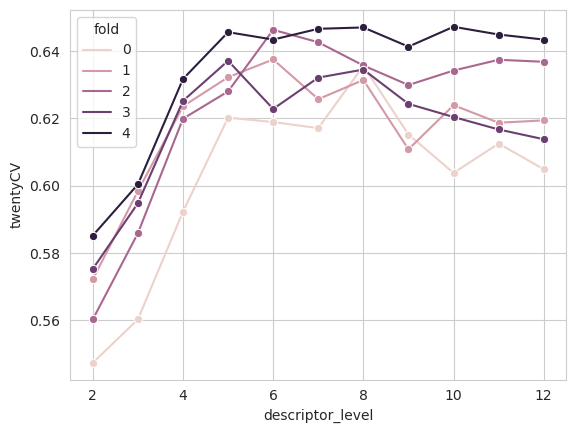

In [63]:
m_2_internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=m_2, hue='fold', marker="o")
plt.savefig("Proteasome/in_vitro/immuno/results/5CV/plots/m_2.png")
m_2_internal_plot

<Axes: xlabel='descriptor_level', ylabel='twentyCV'>

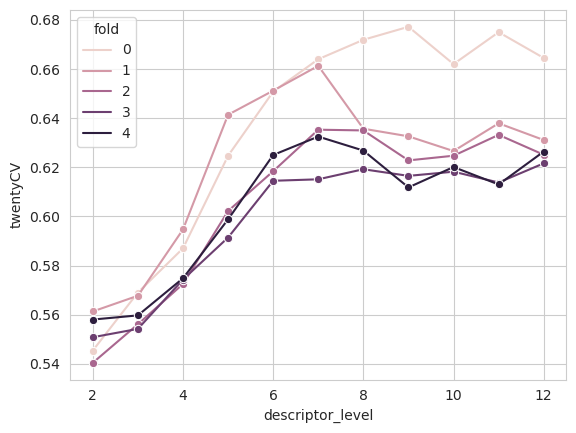

In [64]:
m_3_internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=m_3, hue='fold', marker="o")
plt.savefig("Proteasome/in_vitro/immuno/results/5CV/plots/m_3.png")
m_3_internal_plot

<Axes: xlabel='descriptor_level', ylabel='twentyCV'>

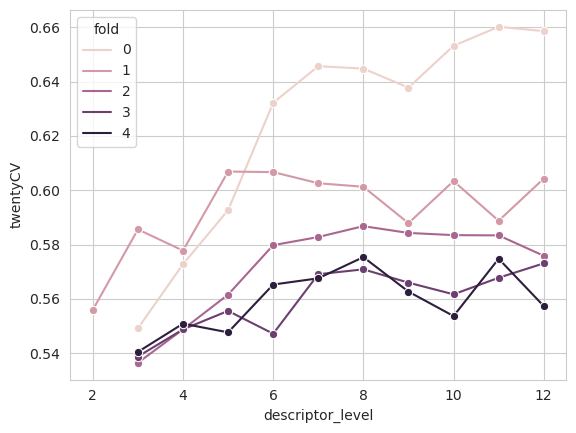

In [65]:
m_4_internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=m_4, hue='fold', marker="o")
plt.savefig("Proteasome/in_vitro/immuno/results/5CV/plots/m_4.png")
m_4_internal_plot

## Внешняя валидация

In [66]:
external_result = pd.read_excel("Proteasome/in_vitro/immuno/results/5CV/external.xlsx")
external_result.head()

,model,level,auc_roc,ap
0,immuno_4,4,0.542357,0.406172
1,immuno_3,7,0.598674,0.465453
2,immuno_4,11,0.540660,0.415563
3,immuno_2,8,0.631233,0.505187
4,immuno_3,6,0.596801,0.453190


<Axes: xlabel='level', ylabel='auc_roc'>

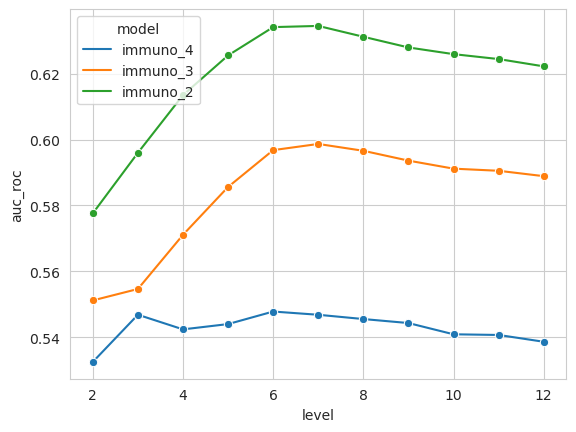

In [67]:
auc_plot = sns.lineplot(x='level', y='auc_roc', data=external_result, hue='model', marker="o")
plt.savefig("Proteasome/in_vitro/immuno/results/5CV/plots/auc_for_levels.png")
auc_plot

<Axes: xlabel='level', ylabel='ap'>

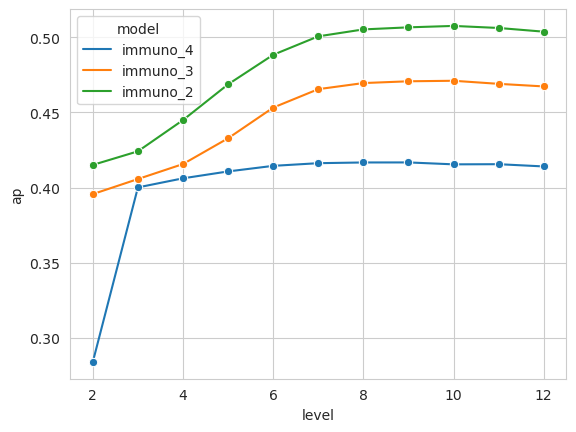

In [68]:
ap_plot = sns.lineplot(x='level', y='ap', data=external_result, hue='model', marker="o")
plt.savefig("Proteasome/in_vitro/immuno/results/5CV/plots/ap_for_levels.png")
ap_plot